# Explatory Data Analysis
To understand the data better and find some insights

In [1]:
from data_preprocessing import dataframe
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the dataframe
df = dataframe()
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-28,5417.028215,5487.839042,5363.920096,5474.562012,65279000
2020-07-29,5474.561449,5474.561449,5399.324954,5430.304688,50262500
2020-07-30,5430.304456,5523.243652,5359.493640,5523.243652,80533500
2020-08-03,5505.541572,5518.818601,5155.913128,5425.879395,137079000
2020-08-04,5448.007502,5505.541294,5425.879121,5496.689941,79357000


In [3]:
# Number of Rows and Columns
df.shape

(1200, 5)

In [4]:
# Dataset Time Range
print(df.index.min())
print(df.index.max())

2020-07-28
2025-07-28


In [5]:
# Descriptive Statistics
df.describe()

,Open,High,Low,Close,Volume
count,1200.000000,1200.000000,1200.000000,1200.000000,1.200000e+03
mean,7712.467533,7779.859067,7644.054372,7711.066368,8.830593e+07
std,1452.243342,1462.022383,1447.835015,1453.848201,5.936717e+07
min,4806.284981,4899.224194,4770.879567,4797.433105,1.065390e+07
25%,6562.166861,6630.172731,6511.595633,6569.263184,5.693132e+07
50%,7941.094664,8010.148172,7872.042391,7964.112793,7.607920e+07
75%,8799.237718,8876.866162,8707.878660,8798.983398,1.016343e+08
max,10522.147296,10570.414062,10401.480469,10570.414062,7.564316e+08


## Close Price Plot

<Axes: title={'center': 'BBCA.JK Close Price'}, xlabel='Date'>

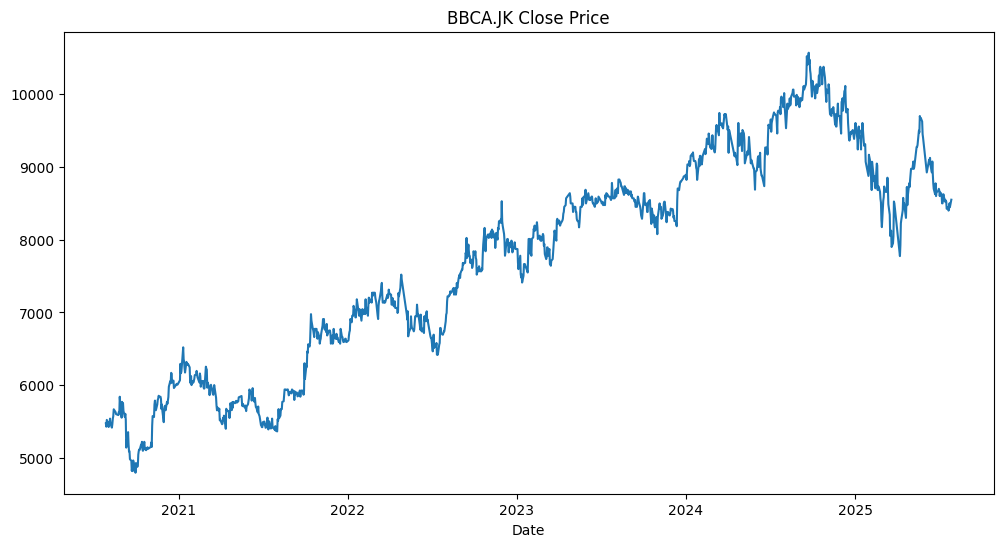

In [69]:
# Close Price Plot
ticker = "BBCA.JK"
df['Close'].plot(figsize=(12, 6), title=f"{ticker} Close Price")

- We can see that BBCA.JK currently on downward trend after having uptrend since the beginning of 2025 with a little bit of rebound before going bearish again

## Daily Return

<Axes: title={'center': 'BBCA.JK Daily Return'}, xlabel='Date'>

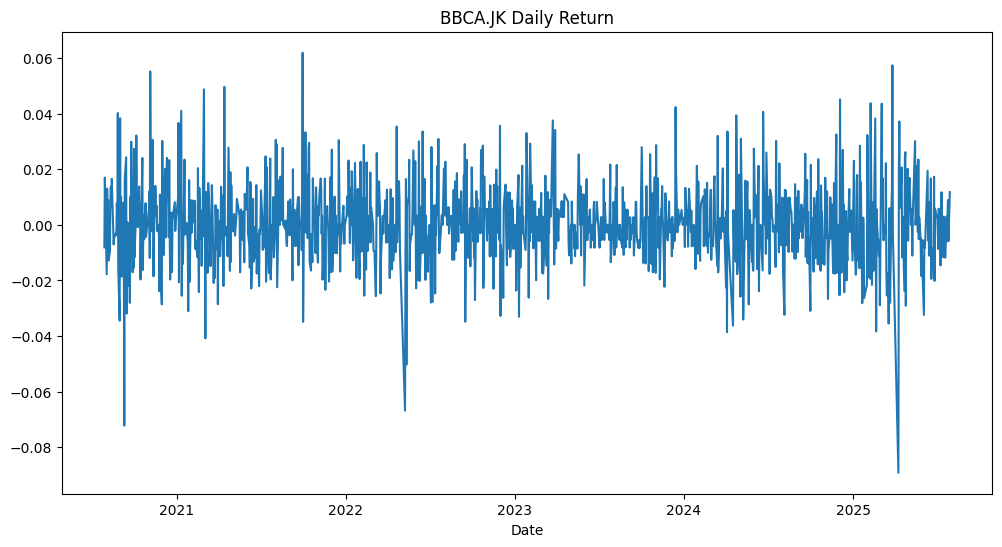

In [8]:
# Daily Return
daily_return = np.log(df['Close'] / df['Close'].shift(1))
daily_return.plot(figsize=(12, 6), title=f"{ticker} Daily Return")

- At the beginning of the year the daily return is steep downward because of there is a bearish momentum since at the end of last year on BBCA.JK stock price

In [10]:
# Adding New Features

volatility = daily_return.rolling(21).std()     # Volatility
moving_average = df["Close"].rolling(20).mean()    # Moving Average
price_range = df["High"] - df["Low"]                  # Price Range

## Simple Moving Average

<Axes: title={'center': 'BBCA.JK Close Price vs Simple Moving Average'}, xlabel='Date'>

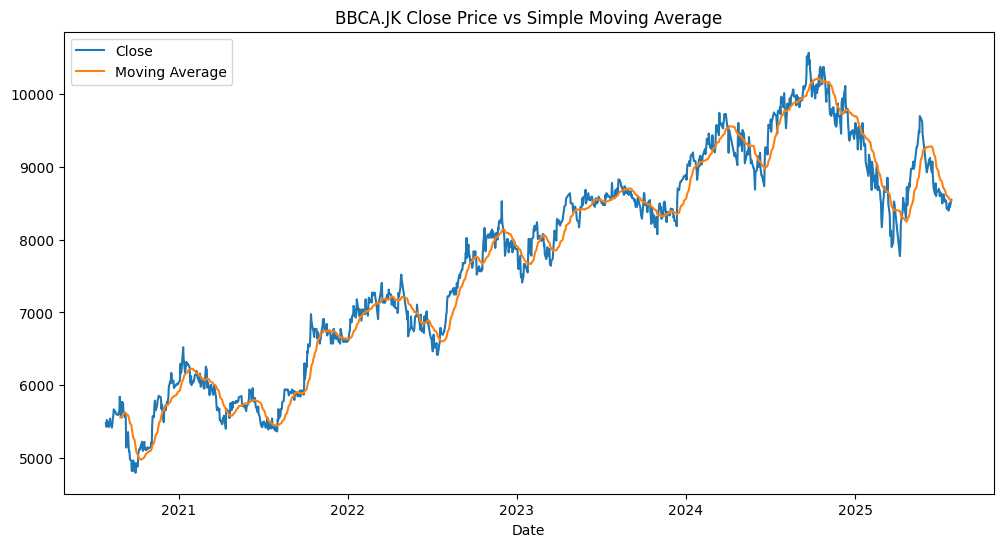

In [11]:
# Plotting Close Price vs Moving Average
close_vs_ma = pd.concat([df['Close'], moving_average], axis=1)
close_vs_ma.columns = ['Close', 'Moving Average']
close_vs_ma.plot(figsize=(12, 6), title=f"{ticker} Close Price vs Simple Moving Average")

- The price is below the Moving Average value and slowly trying to reach back to the average value

## Relative Strength Index

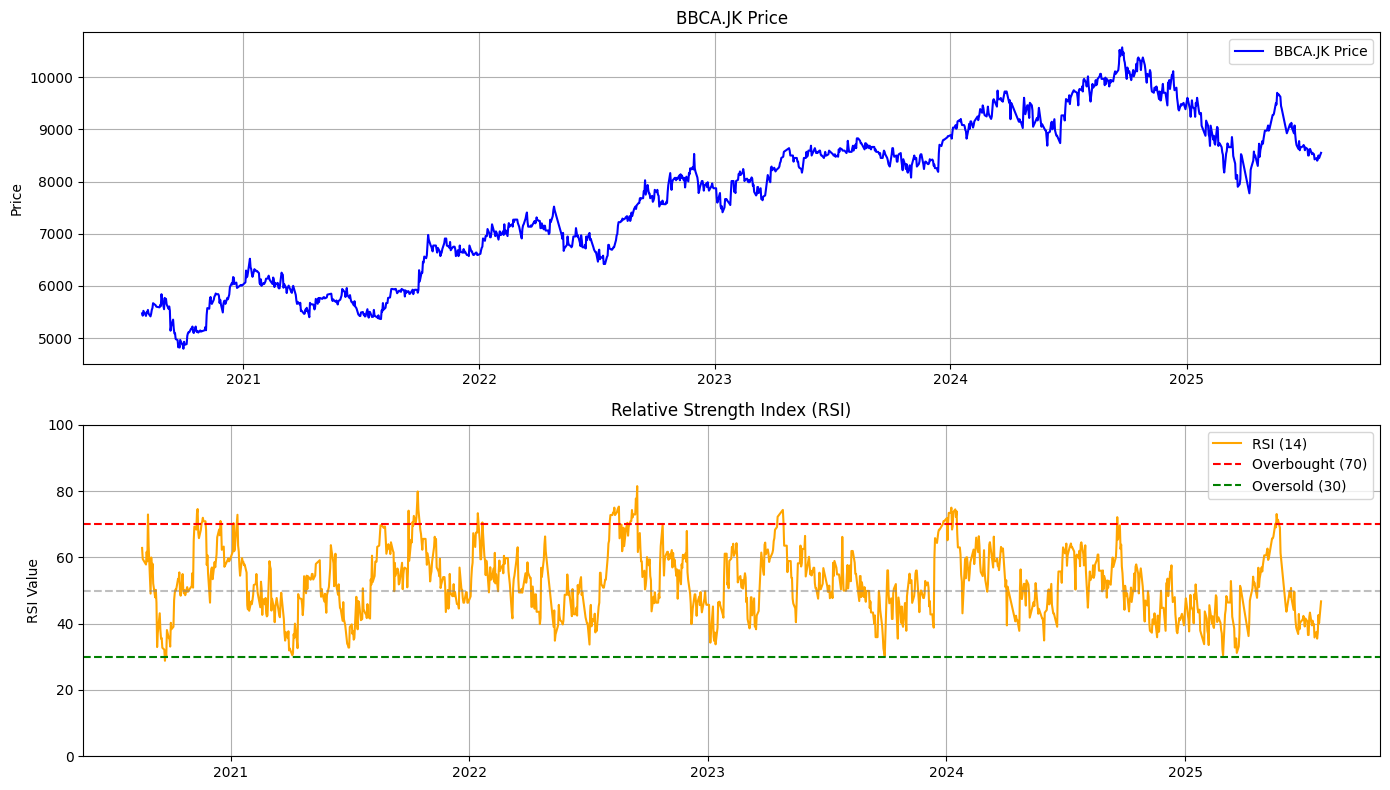

In [13]:
# Relative Strength Index
import ta

rsi = ta.momentum.RSIIndicator(close=df['Close'], window=14).rsi()

# Plotting RSI
plt.figure(figsize=(14, 8))

# ---- Subplot 1: Price ----
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Close'], label=f'{ticker} Price', color='blue')
plt.title(f'{ticker} Price')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# ---- Subplot 2: RSI ----
plt.subplot(2, 1, 2)
plt.plot(df.index, rsi, label='RSI (14)', color='orange')
plt.axhline(70, color='red', linestyle='--', label='Overbought (70)')
plt.axhline(30, color='green', linestyle='--', label='Oversold (30)')
plt.axhline(50, color='gray', linestyle='--', alpha=0.5)
plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI Value')
plt.ylim(0, 100)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

According to RSI graph, BBCA.JK stock is rebound after strong downward trend and almost back to average value.

## EMA and MACD

In [14]:
# Adding EMA and MACD
ema12 = df['Close'].ewm(span=12, adjust=False).mean()
ema26 = df['Close'].ewm(span=26, adjust=False).mean()

# Calculate MACD Line
macd = ema12 - ema26

# Calculate Signal Line (9-period EMA of MACD)
signal = macd.ewm(span=9, adjust=False).mean()

# Step 4: Calculate MACD Histogram
macd_hist = macd - signal

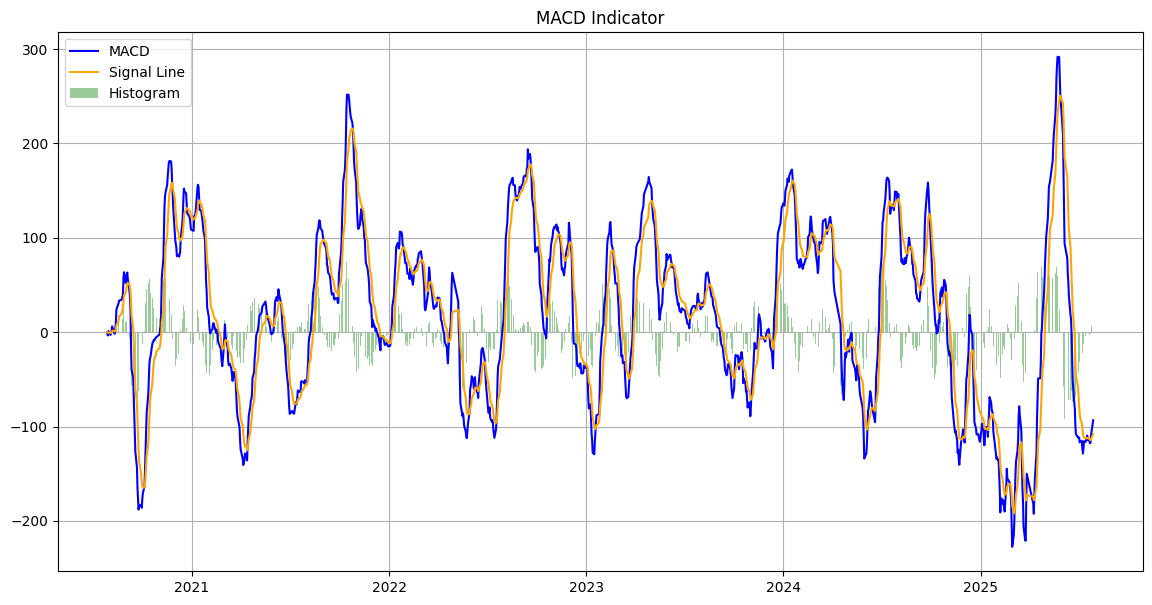

In [15]:
# Plotting the MACD Line

plt.figure(figsize=(14,7))
plt.plot(macd, label='MACD', color='blue')
plt.plot(signal, label='Signal Line', color='orange')
plt.bar(macd.index, macd_hist, label='Histogram', color='green', alpha=0.4)
plt.legend(loc='upper left')
plt.title('MACD Indicator')
plt.grid(True)
plt.show()

Moving Average Convergence Divergence is a momentum and trend-following indicator where they measure the relationship between 2 EMA. <br>
When MACD > Signal Line -> Bullish Momentum <br>
When MACD < Signal Line -> Bearish Momentum <br>

For the histogram it shows the momentum strength and direction. <br>

Based on the information we can see that:
1. The MACD line crosses over the signal line where indicates there will be bullish momentum
2. Histogram line also shows that the bear momentum is losing out and slightly bull direction shows

## Bollinger Bands

In [16]:
# Bollinger Bands
# Choose window (typically 20 days)
window = 20

# Calculate rolling mean and rolling standard deviation
rolling_mean = df['Close'].rolling(window=window).mean()
rolling_std = df['Close'].rolling(window=window).std()

# Calculate Upper and Lower Bollinger Bands
bollinger_upper = rolling_mean + (2 * rolling_std)
bollinger_lower = rolling_mean - (2 * rolling_std)


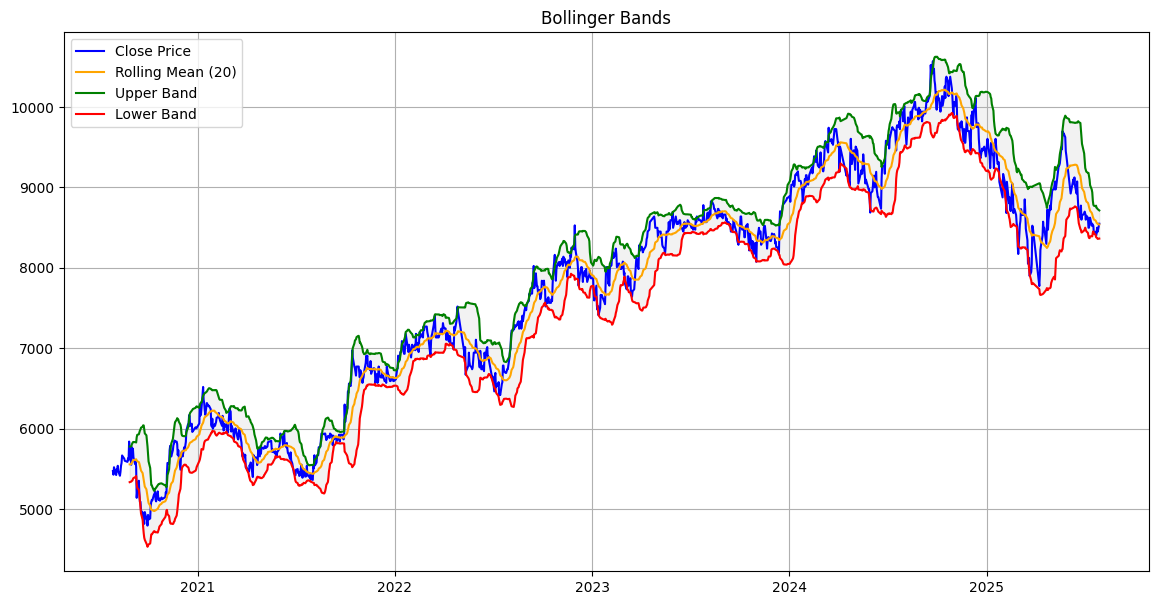

In [17]:
# Plotting the Bollinger Bands
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (20)', color='orange')
plt.plot(bollinger_upper, label='Upper Band', color='green')
plt.plot(bollinger_lower, label='Lower Band', color='red')
plt.fill_between(df.index, bollinger_upper, bollinger_lower, color='gray', alpha=0.1)
plt.legend(loc='upper left')
plt.title('Bollinger Bands')
plt.grid(True)
plt.show()

Based on the bollinger bands we can see that the market is close to lower band which means stock might be oversold and ready for a rebound back to the average price

# Pre - Modeling

## Feature Engineering

In [18]:
# Feature engineering function declaration

def feature_engineering(data):
    data['Return'] = np.log(data['Close'] / data['Close'].shift(1)) # Daily Return
    data['Volatility'] = data['Return'].rolling(21).std()     # Volatility
    data['Moving Average'] = data["Close"].rolling(20).mean()    # Moving Average
    data['Price Range'] = data["High"] - data["Low"]                  # Price Range
    data['RSI'] = ta.momentum.RSIIndicator(close=data['Close'], window=14).rsi() # Relative Strength Index
    data['MACD'] = ema12 - ema26
    return data

In [19]:
# Target column function declaration

def ptg_return_target(data, n):
    data['Target'] = data['Close'].shift(-n) / data['Close'] -1    # Percentage Return in n Days
    return data

## Time Series Split Data
Because the data is time series, it means the data cannot be randomly splitted using regula train_test_split model.

In [20]:
# Data split function declaration

def time_series_split(data, test_size):
    data = data.dropna()
    X = data.drop(columns=('Target'))
    y = data['Target']

    split_point = int(len(data) - test_size)
    X_train, X_test = X[:split_point], X[split_point:]
    y_train, y_test = y[:split_point], y[split_point:]

    return X_train, X_test, y_train, y_test

In [ ]:
# Adding features and target columns

feature_engineering(df)
ptg_return_target(df, 30)   # set the target into predicting 30 days
X_train, X_test, y_train, y_test = time_series_split(df, 30)   # test size is the same with target predicting 30 days

In [41]:
df.head()

,Open,High,Low,Close,Volume,Return,Volatility,Moving Average,Price Range,RSI,MACD,Target
Date,,,,,,,,,,,,
2020-07-28,5417.028215,5487.839042,5363.920096,5474.562012,65279000,NaN,NaN,NaN,123.918946,NaN,0.000000,-0.021827
2020-07-29,5474.561449,5474.561449,5399.324954,5430.304688,50262500,-0.008117,NaN,NaN,75.236495,NaN,-3.530499,-0.044825
2020-07-30,5430.304456,5523.243652,5359.493640,5523.243652,80533500,0.016970,NaN,NaN,163.750012,NaN,1.157609,-0.078526
2020-08-03,5505.541572,5518.818601,5155.913128,5425.879395,137079000,-0.017785,NaN,NaN,362.905473,NaN,-2.949514,-0.061175
2020-08-04,5448.007502,5505.541294,5425.879121,5496.689941,79357000,0.012966,NaN,NaN,79.662173,NaN,-0.485027,-0.093398


In [42]:
print(f'X_train size: {X_train.shape}, X_test size: {X_test.shape}')
print(f'y_train size: {y_train.shape}, y_test size: {y_test.shape}')

X_train size: (1119, 11), X_test size: (30, 11)
y_train size: (1119,), y_test size: (30,)


# Model Training
## Creating Function

In [28]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Models
models = {
    'Gradient Boost Regression' : GradientBoostingRegressor(), 
    'Linear Regression' : LinearRegression(),
    'Random Forest Regressor' : RandomForestRegressor()
          }

# Plotting function for prediction vs actual
def model_plot(y_test, y_pred):
    plt.figure(figsize=(10,5))
    plt.plot(y_test.index, y_test, label='Actual')
    plt.plot(y_test.index, y_pred, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Actual vs Predicted Stock Prices')
    plt.legend()
    plt.show()

# Training function
def model_fit_train(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f'=============== {name} ===============')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print(f'Root Mean Squared Error: {rmse}')

    model_plot(y_test, y_pred)

## Initial Test

=============== Gradient Boost Regression ===============
Mean Absolute Error: 0.09369741510092668
Mean Squared Error: 0.009790719069806667
R-squared: -3.995486500017944
Root Mean Squared Error: 0.09894806248637043


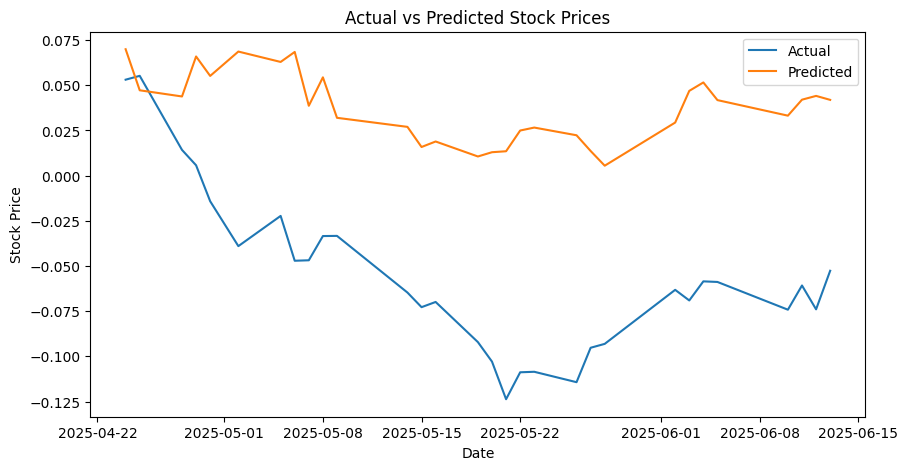

=============== Linear Regression ===============
Mean Absolute Error: 0.044189948781653436
Mean Squared Error: 0.0024714400167755953
R-squared: -0.2609947391382357
Root Mean Squared Error: 0.04971357980246037


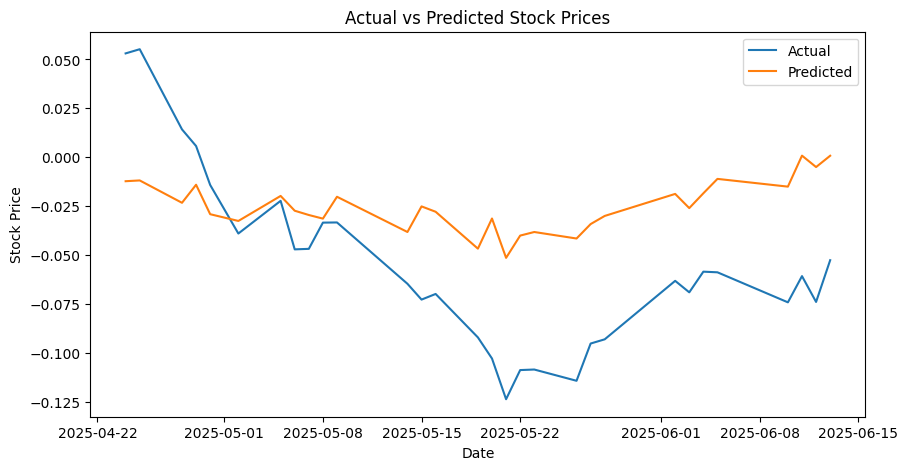

=============== Random Forest Regressor ===============
Mean Absolute Error: 0.0885585082144599
Mean Squared Error: 0.008978201324663726
R-squared: -3.5809182340972336
Root Mean Squared Error: 0.09475337104643679


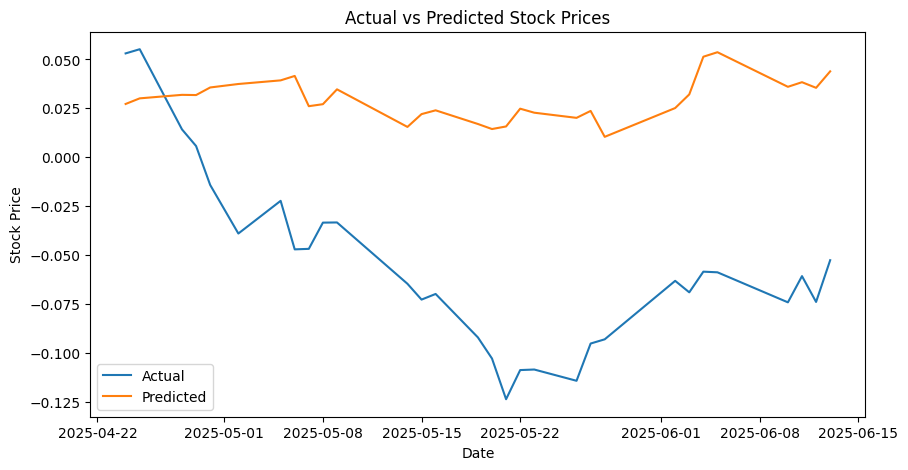

In [30]:
# Training and comparison
for name, model in models.items():
    model_fit_train(name, model, X_train, X_test, y_train, y_test)

Key Points:
1. MAE = n
Means that on average the model's prediction are approx. n away from the true price
2. MSE = n
Means that on average the squared prediction errors are approx. n
3. R-squared = n 
Indicates that the model can explain approximately n of the variance in stock prices.
4. RMSE = n
Indicates that on average the model's predictions have an error of approximately n in the same units as the stock prices.

Insights: <br>
1. If we look at the chart, linear regression is the best performance model because the model can capture up and down momentum even if the predicted value is a bit far from true value

## Evaluation

## Hyperparameter Tuning

In [67]:
from sklearn.model_selection import RandomizedSearchCV

param_space = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, 1, -1],
    'positive': [True, False]
}

model = LinearRegression()

random_search = RandomizedSearchCV(model, param_space, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

# Parameter which gives the best results
print(f"Best Hyperparameters: {random_search.best_params_}")

# Accuracy of the model after using best parameters
print(f"Best Score: {random_search.best_score_}")

Best Hyperparameters: {'positive': False, 'n_jobs': 1, 'fit_intercept': False, 'copy_X': True}
Best Score: -0.0255295054516671


=============== Linear Regression ===============
Mean Absolute Error: 0.042676456899324346
Mean Squared Error: 0.0023475984300036262
R-squared: -0.19780745223425256
Root Mean Squared Error: 0.04845202193927129


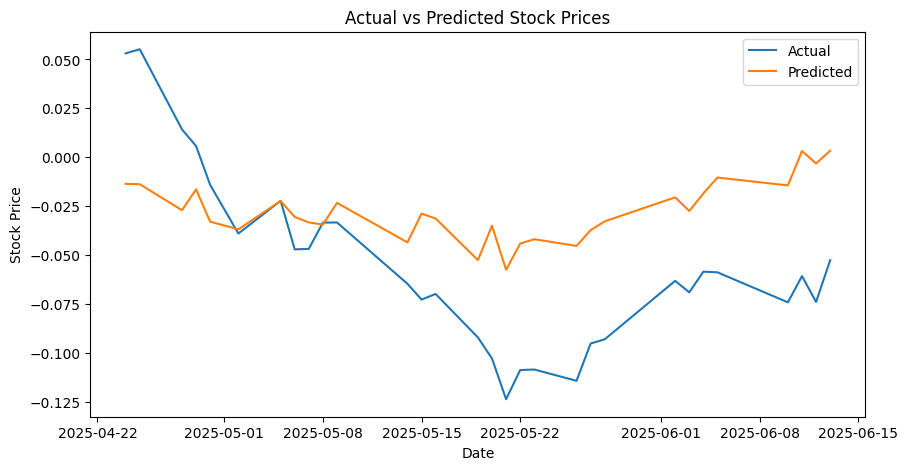

In [68]:
# Training
model_fit_train("Linear Regression", LinearRegression(positive=False, n_jobs=1, fit_intercept=False, copy_X=True), X_train, X_test, y_train, y_test)

We can see improvement on all metrics even just slightly.

Key Points:
1. MAE = 0.042
Means that on average the model's prediction are approx. 0.042 away from the true price
2. MSE = 0.0023
Means that on average the squared prediction errors are approx. 0.0023
3. R-squared = -0.197 
Indicates that the model can explain approximately -19.7% of the variance in stock prices.
4. RMSE = 0.048
Indicates that on average the model's predictions have an error of approximately 0.048 in the same units as the stock prices.

# Model Save

In [70]:
import joblib

model = LinearRegression(positive=False, n_jobs=1, fit_intercept=False, copy_X=True)
joblib.dump(model, 'linear_regression.pkl')

['linear_regression.pkl']